## Цели и задачи проекта

### **Цель проекта:**  
Провести исследовательский анализ  заведения.
### **Задачи проекта:**  

 **1. Общая характеристика рынка**
 
 **2. Анализ популярных форматов**
 
 **3. Географический анализ**
 
 **4. Анализ сетевых и несетевых заведений**
 
 **5. Исследование средних цен и вместимости** 
 
 **6. Анализ отзывов и рейтингов**
 
 **7. Выводы и рекомендации**


### Описание данных

**Файл** `rest_info.csv`
Содержит информацию о заведениях общественного питания Москвы:

| Столбец | Описание |
|---------|----------|
| `name` | Название заведения |
| `address` | Адрес заведения |
| `district` | Административный район (например, "Центральный административный округ") |
| `category` | Категория заведения ("кафе", "пиццерия", "кофейня" и др.) |
| `hours` | Информация о днях и часах работы |
| `rating` | Рейтинг заведения по оценкам пользователей Яндекс Карт (максимум 5.0) |
| `chain` | Признак сетевого заведения:<br>`0` - не сетевое<br>`1` - сетевое (для маленьких сетей возможны ошибки) |
| `seats` | Количество посадочных мест |

**Файл** `rest_price.csv` 
Содержит информацию о среднем чеке:

| Столбец | Описание |
|---------|----------|
| `price` | Категория цен ("средние", "ниже среднего", "выше среднего" и др.) |
| `avg_bill` | Строка с информацией о стоимости:<br>• "Средний счёт: 1000–1500 ₽"<br>• "Цена чашки капучино: 130–220 ₽"<br>• "Цена бокала пива: 400–600 ₽" |
| `middle_avg_bill` | Числовая оценка среднего чека:<br>• Для строк `avg_bill`, начинающихся с "Средний счёт"<br>• Для диапазона - медиана двух значений<br>• Для одного числа - само число<br>• В остальных случаях - пропуск |
| `middle_coffee_cup` | Числовая оценка цены капучино:<br>• Для строк `avg_bill`, начинающихся с "Цена одной чашки капучино"<br>• Для диапазона - медиана двух значений<br>• Для одного числа - само число<br>• В остальных случаях - пропуск |

### Содержимое проекта

**1. Загрузка данных и знакомство с ними**

**2. Предобработка данных**

**3. Исследовательский анализ данных**

**4. Итоговый вывод и рекомендации**



## 1. Загрузка данных и знакомство с ними



In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('')
rest_price = pd.read_csv('')

Познакомимся с данными датасета `` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод



Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о различных заведениях.

После первичного анализа данных можно сделать следующие выводы:
- В основном все столбцы типа `object`. Значения в столбцах `rating`, `chain` и `seats`представлены численными типами. Столбец `chain` показывает наличие у ресторана того или иного признака и содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
- Пропуски содержатся только в столбцах: `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях.
После первичного анализа данных можно сделать следующие выводы:
- В столбцах представлены данные двух типов: `object` и `float64`.
- Пропуски содержатся во всех столбцах кроме `id`. Следует обратить внимание на это и все проверить. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма



In [7]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, on='id', how = 'left')

In [8]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных



В основном все типы данных в оптимальном виде кроме `rating`, `chain` и `seats`

In [9]:
#Оптимизируем данные для этих трех столбцов
df['rating'] = pd.to_numeric(df['rating'], downcast='float')#Понижаем размерность типа
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
df['seats'] = df['seats'].astype('Int64')# Посадочные места приведем к целочисленному типу
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int64(1), float32(1), float64(2), int8(1), object(8)
memory usage: 837.3+ KB


In [10]:
df.isna().sum()# Считаем пропуски в данных

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [11]:
df.isna().sum() / df.shape[0]# Подсчитываем долю строк с пропусками

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

- Пропуски в столбце `hours` могут появиться из-за того что заведение может работать круглосуточно.
- Пропускив столбце `seats` могут появиться из-за того, что не во всех заведениях могут быть посадочные места.
- Пропускив столбце `price` могут появиться из-за ошибок.
- Пропуски в стобце `avg_bill` могут появиться из-за того что не смогли определить категорию.
- Пропуски в столбце `middle_avg_bill` могут появится из-за недостатка данных о заведениях.
- Пропуски в столбце `middle_coffee_cup` могут появится из-за банального отсутсятвия в меню кофе.

Пропусков достаточно много, но мы не можем их удалить, в противном случае анализ может быть не достоверным.

In [12]:
# Проверяем явные дубликаты в датафрейме df
df.duplicated().sum()

0

В датафреймах нет полных дубликатов строк. Проверим неявные дубликаты — значения по id клиентов должны быть уникальными, то есть каждая строка в данных — уникальный клиент:

In [13]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

In [14]:
# Проверим категориальные значения столбцов 
for column in ['district', 'category', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



In [15]:
df['name'] = df['name'].str.lower()# приводим названия к нижнему регистру

In [16]:
df.duplicated(subset=['name', 'address'], keep=False).value_counts()#считаем кол-во неявных дубликатов

False    8400
True        6
dtype: int64

In [17]:
df = df.drop_duplicates(subset=['name', 'address'], keep='first')# Удаляем неявные дубликаты

Всего 6 строк с неявными дубликатами и мы их удалили.

In [18]:
# создаем столбец с обозначением того, что заведение работает ежедневно и круглосуточно
df['is_24_7'] = df['hours'].str.contains(
    'ежедневно, круглосуточно', 
    case=False, regex=True
).fillna(False)

In [19]:
df['is_24_7'].value_counts()#выводим количество груглосуточных заведений и нет

False    7673
True      730
Name: is_24_7, dtype: int64

Всего 730 заведений работает круглосуточно.

---

### Промежуточный вывод



В результате предобработки данных были выполнены следующие действия:
- Оптимизировали данныке в столбцах `rating`, `chain` и `seats`
- Данные проверили на явные и неявные дубликаты — в данных их нет.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>С предобработкой закончили, можно переходить к анализу!
</div>

## 3. Исследовательский анализ данных


In [20]:
df['category'].value_counts()

кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

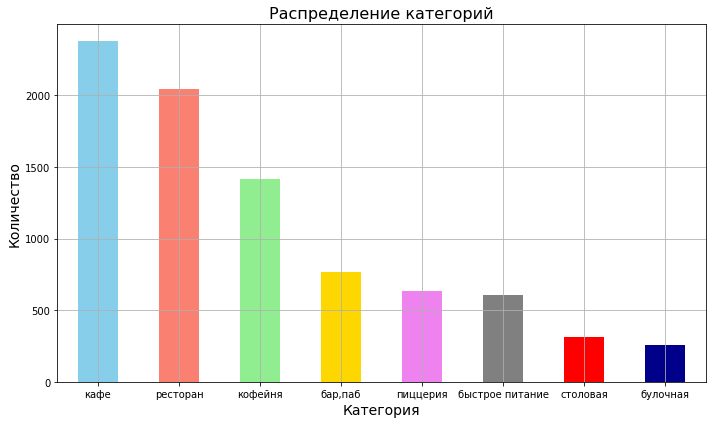

In [21]:
# Строим столбчатую диаграмму
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 6))  # Размер графика
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'grey', 'red', 'darkblue']
category_counts.plot(kind='bar', color=colors, grid=True)  # Тип диаграммы и цвет

# Добавляем подписи
plt.title('Распределение категорий', fontsize=16)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=0)  # Наклон подписей по оси X для удобства

# Отображаем график
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Больше всего заведений категории кафе(2378) и рестораны(2043), а меенньше всего заведений категории булочная(256) и столовая(315). 

In [22]:
df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

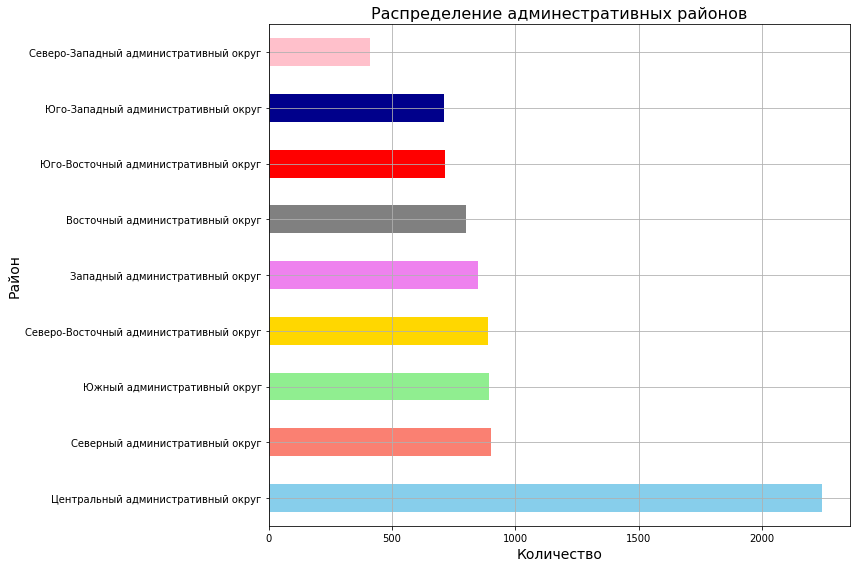

In [23]:
# Строим столбчатую диаграмму
district_counts = df['district'].value_counts()
plt.figure(figsize=(12, 8))  # Размер графика
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'grey', 'red', 'darkblue', 'pink']
district_counts.plot(kind='barh', color=colors, grid=True)  # Тип диаграммы и цвет

# Добавляем подписи
plt.title('Распределение админестративных районов', fontsize=16)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Район', fontsize=14)
plt.xticks(rotation=0)  # Наклон подписей по оси X для удобства

# Отображаем график
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Больше всего заведений в Центральном административном округе и их 2242, что в несколько раз больше чем востальных округах.

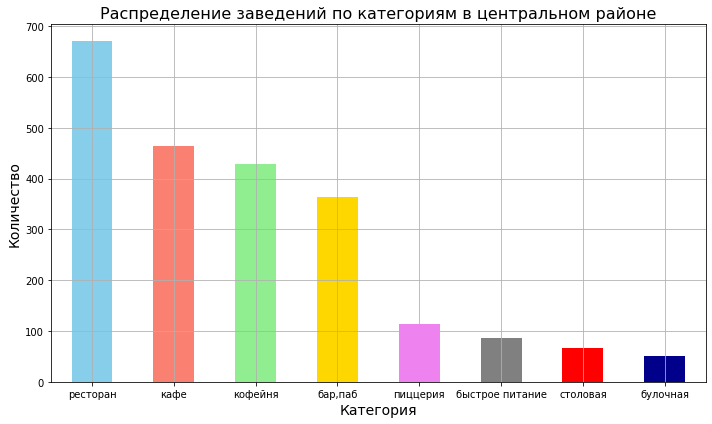

In [24]:
# Строим диаграмму распределения заведений по категориям в центральном районе
df_district = df[df['district'] == 'Центральный административный округ'].copy()
# Строим столбчатую диаграмму
category_district = df_district['category'].value_counts()
plt.figure(figsize=(10, 6))  # Размер графика
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'grey', 'red', 'darkblue']
category_district.plot(kind='bar', color=colors, grid=True)  # Тип диаграммы и цвет

# Добавляем подписи
plt.title('Распределение заведений по категориям в центральном районе', fontsize=16)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=0)  # Наклон подписей по оси X для удобства

# Отображаем график
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Больше всего в центральном районе ресторанов и кафе, а меньше всего столовых и булочных.

In [25]:
df['chain'].value_counts()# определяем количество сетевых заведений

0    5200
1    3203
Name: chain, dtype: int64

In [26]:
df['chain'].value_counts() / df.shape[0] # Процент сетевых и несетевых заведений

0    0.618827
1    0.381173
Name: chain, dtype: float64

In [27]:
# Количество заведений по категориям
category_chain = df.groupby('category')['chain'].value_counts()
print(category_chain)

category         chain
бар,паб          0         596
                 1         168
булочная         1         157
                 0          99
быстрое питание  0         371
                 1         232
кафе             0        1598
                 1         779
кофейня          1         720
                 0         693
пиццерия         1         330
                 0         303
ресторан         0        1313
                 1         729
столовая         0         227
                 1          88
Name: chain, dtype: int64


In [28]:
#Соотношение сетевых заведений ко всем заведениям по категориям
df1=df[df['chain'] == 1].copy()
chain_perc = df1.groupby('category')['chain'].value_counts() / df.groupby('category')['chain'].count()
print(chain_perc)

category         chain
бар,паб          1        0.219895
булочная         1        0.613281
быстрое питание  1        0.384743
кафе             1        0.327724
кофейня          1        0.509554
пиццерия         1        0.521327
ресторан         1        0.357003
столовая         1        0.279365
Name: chain, dtype: float64


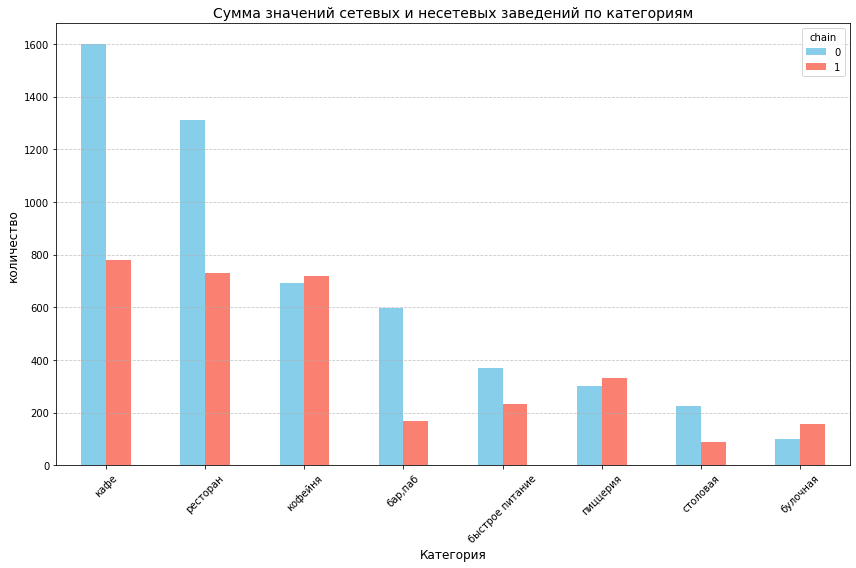

In [29]:
# Строим столбчатую диаграмму для сетевых и несетевых заведений по категориям
category_chain = df.groupby('category')['chain'].value_counts().unstack(fill_value=0).sort_values(by=[0, 1], ascending=False)
colors = ['skyblue', 'salmon']
category_chain.plot(kind = 'bar', color=colors, figsize=(12, 8))

# Оформление
plt.title('Сумма значений сетевых и несетевых заведений по категориям', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('количество', fontsize=12)
plt.xticks(rotation=45)  # Наклон подписей категорий
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Сетка по оси Y
plt.tight_layout()
plt.show()

Сетевых заведений меньше, чем несетевых. Сетевых 3205 или (38%), а несетевых 5201 или (62%). Чаще всего сетевыми заведениями являются рестораны и кафе, а реже всего булочные и столовые.

In [30]:
df['seats'].describe()# статистическое описание данных

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Максимальное значение посадочных мест подозрительно большое.

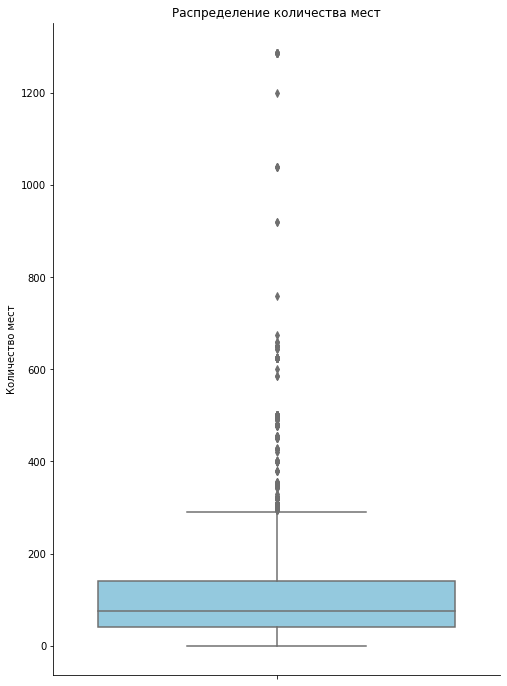

In [31]:
# Строим ящик с усами
plt.figure(figsize=(8, 12))
sns.boxplot(y=df['seats'], color='skyblue')
plt.title('Распределение количества мест')
plt.ylabel('Количество мест')
sns.despine() 
plt.show()

Тут видно что много значений выбросов которые мешают анализу, поэтому будем считать среднее количество посадочных мест в заведениях по 95 процентилю.

In [32]:
# Находим 95-й процентиль для столбца 'seats'
percentile_95 = df['seats'].quantile(0.95)

# Фильтруем данные, оставляя только значения <= 95-го процентиля
filtered_df = df[df['seats'] <= percentile_95]

# Группируем и считаем среднее
category_seats = filtered_df.groupby('category')['seats'].mean().sort_values(ascending=False)
print(category_seats)

category
ресторан           100.160401
бар,паб             95.181193
кофейня             89.962079
быстрое питание     85.740299
столовая            81.375796
булочная            79.763889
пиццерия            79.014634
кафе                78.379518
Name: seats, dtype: Float64


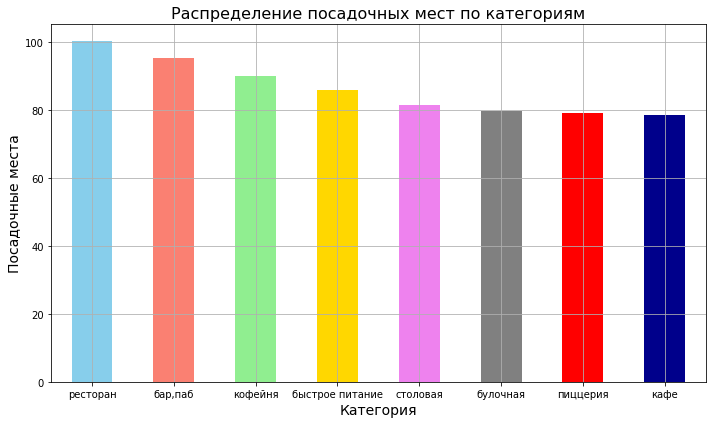

In [33]:
# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))  # Размер графика
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'grey', 'red', 'darkblue']
category_seats.plot(kind='bar', color=colors, grid=True)
# Добавляем подписи
plt.title('Распределение посадочных мест по категориям', fontsize=16)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Посадочные места', fontsize=14)
plt.xticks(rotation=0)  # Наклон подписей по оси X для удобства

# Отображаем график
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Самое большое среднее количество посадочных мест в ресторане(100), а самое маленькое у кафе(78). У значений посадочных месть очень большие выбросы.

In [34]:
df['rating'].describe()# статистическое описание данных

count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [35]:
category_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(category_rating)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290401
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float32


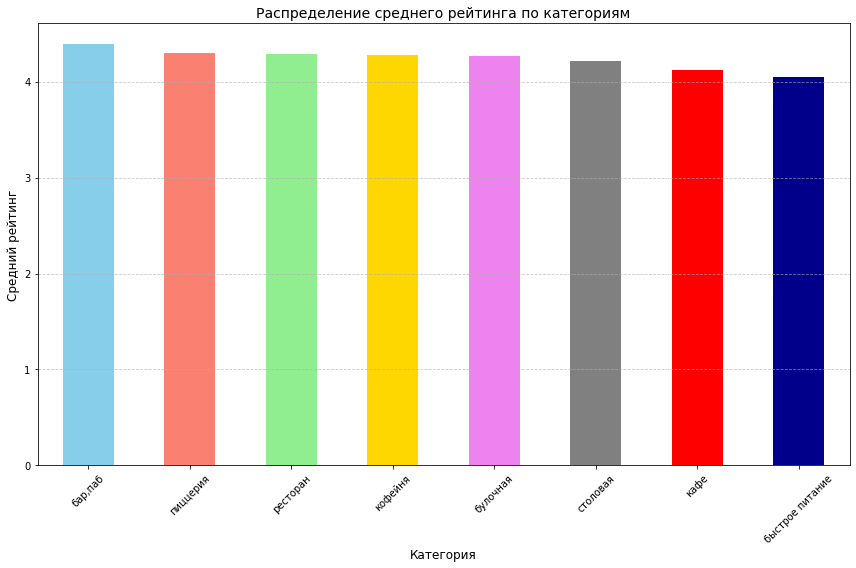

In [36]:
# Строим столбчатую диаграмму для среднего рейтинга по категориям
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'grey', 'red', 'darkblue']
category_rating.plot(kind = 'bar', color=colors, figsize=(12, 8))

# Оформление
plt.title('Распределение среднего рейтинга по категориям', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.xticks(rotation=45)  # Наклон подписей категорий
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Сетка по оси Y
plt.tight_layout()
plt.show()

В среднем показателе рейтинга нет ничего особенного, все значения примерно равны.

In [37]:
!pip install phik

     |████████████████████████████████| 686 kB 2.4 MB/s eta 0:00:01


In [38]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [39]:
new_df = df[['category', 'district', 'rating', 'chain', 'seats', 'price', 'is_24_7']]# Создали датафрейм для корреляции
print(new_df)

      category                              district  rating  chain  seats  \
0         кафе       Северный административный округ     5.0      0   <NA>   
1     ресторан       Северный административный округ     4.5      0      4   
2         кафе       Северный административный округ     4.6      0     45   
3      кофейня       Северный административный округ     5.0      0   <NA>   
4     пиццерия       Северный административный округ     5.0      1    148   
...        ...                                   ...     ...    ...    ...   
8401      кафе   Юго-Западный административный округ     4.4      0     86   
8402      кафе          Южный административный округ     4.8      0    150   
8403      кафе  Юго-Восточный административный округ     3.9      0    150   
8404      кафе  Юго-Восточный административный округ     4.2      1    150   
8405      кафе          Южный административный округ     3.9      0     12   

              price  is_24_7  
0               NaN    False  
1

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляция Phik между rating и другими столбцами:
price       0.262056
category    0.198917
district    0.189389
is_24_7     0.160864
chain       0.119061
seats       0.000000
Name: rating, dtype: float64


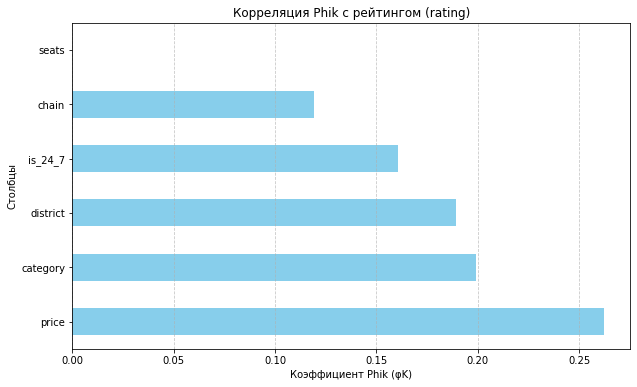

In [40]:
# Создаем корреляцию
phik_matrix = new_df.phik_matrix()

# Извлекаем корреляции только для столбца 'rating' (исключая его самого)
rating_corr = phik_matrix['rating'].drop('rating')

# Сортируем по убыванию абсолютных значений
sorted_corr = rating_corr.abs().sort_values(ascending=False)

# Выводим результаты
print("Корреляция Phik между rating и другими столбцами:")
print(sorted_corr)

# Визуализация
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='barh', color='skyblue')
plt.title('Корреляция Phik с рейтингом (rating)')
plt.xlabel('Коэффициент Phik (φK)')
plt.ylabel('Столбцы')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Самая высокая корреляция с ценой. Все корреляции положительные, единственный столбец чей коэфициент равен 0 это `seats`.

In [41]:
# Найдем топ 15 популярных заведений заведений 
df_chain = df[df['chain'] == 1].copy()# Для сетевых заведений
chain_stats = df_chain.groupby(['name', 'category'], as_index=False).agg(
    num_venues=('name', 'count'),  # количество заведений в сети
    avg_rating=('rating', 'mean')  # средний рейтинг
)

# Сортируем по популярности и берём топ-15
top_chains = chain_stats.sort_values('num_venues', ascending=False).head(15)
print(top_chains)

                                     name  category  num_venues  avg_rating
1126                          шоколадница   кофейня         119    4.178151
496                        домино'с пицца  пиццерия          76    4.169737
489                            додо пицца  пиццерия          74    4.286487
205                      one price coffee   кофейня          71    4.064789
1142                         яндекс лавка  ресторан          69    3.872464
72                                  cofix   кофейня          65    4.075385
241                                 prime  ресторан          49    4.114285
617                              кофепорт   кофейня          42    4.147619
632   кулинарная лавка братьев караваевых      кафе          39    4.394872
963                               теремок  ресторан          36    4.105556
50                               cofefest   кофейня          31    3.977419
1050                              чайхана      кафе          26    3.946154
384         

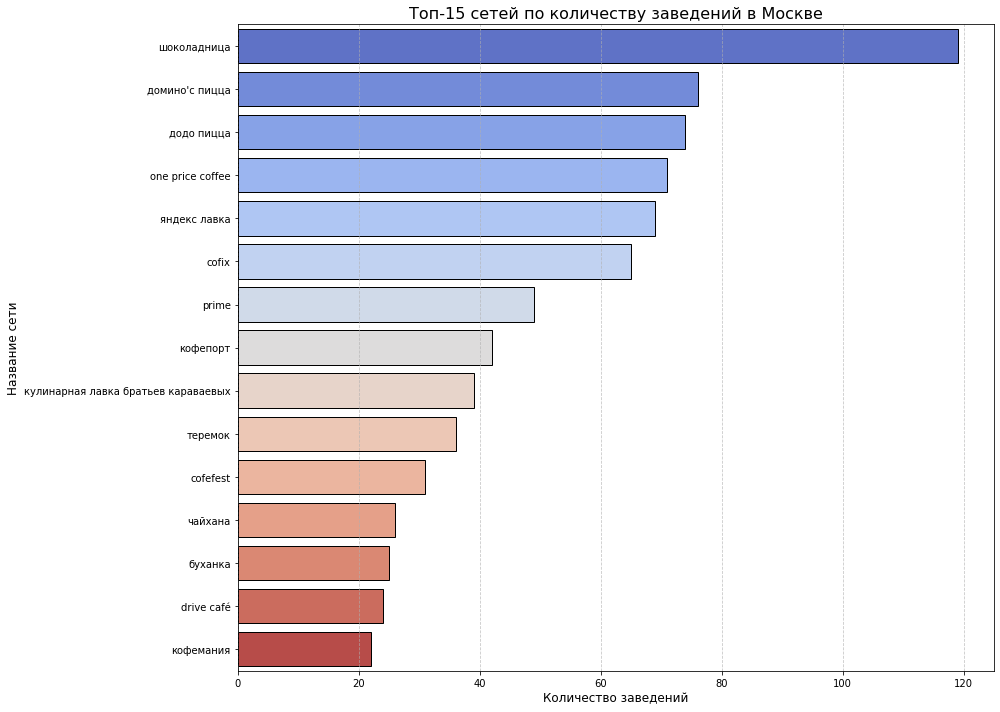

In [42]:
# строим столбчатую диаграмму
plt.figure(figsize=(14, 10))
sns.barplot(
    x='num_venues', 
    y='name', 
    data=top_chains,
    palette='coolwarm',  # Цветовая гамма
    edgecolor='black' # Границы столбцов
)

# Настройка оформления
plt.title('Топ-15 сетей по количеству заведений в Москве', fontsize=16)
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Название сети', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Сетка только по X

# Отображаем график
plt.tight_layout()
plt.show()

In [44]:
# Найдем топ 15 популярных заведений заведений 
df_chain = df[df['chain'] == 1].copy()# Для сетевых заведений
chain_stats = df_chain.groupby(['name', 'category'], as_index=False).agg(
    num_venues=('name', 'count'),  # количество заведений в сети
    avg_rating=('rating', 'mean')  # средний рейтинг
)

# Сортируем по популярности и берём топ-15
top_chains1 = chain_stats.sort_values('num_venues', ascending=False).head(15)
top_chains2=top_chains1.sort_values('avg_rating', ascending=False)
print(top_chains2)

                                     name  category  num_venues  avg_rating
615                             кофемания   кофейня          22    4.463636
384                               буханка  булочная          25    4.416000
632   кулинарная лавка братьев караваевых      кафе          39    4.394872
489                            додо пицца  пиццерия          74    4.286487
1126                          шоколадница   кофейня         119    4.178151
496                        домино'с пицца  пиццерия          76    4.169737
617                              кофепорт   кофейня          42    4.147619
241                                 prime  ресторан          49    4.114285
963                               теремок  ресторан          36    4.105556
72                                  cofix   кофейня          65    4.075385
205                      one price coffee   кофейня          71    4.064789
89                             drive café      кафе          24    4.025000
50          

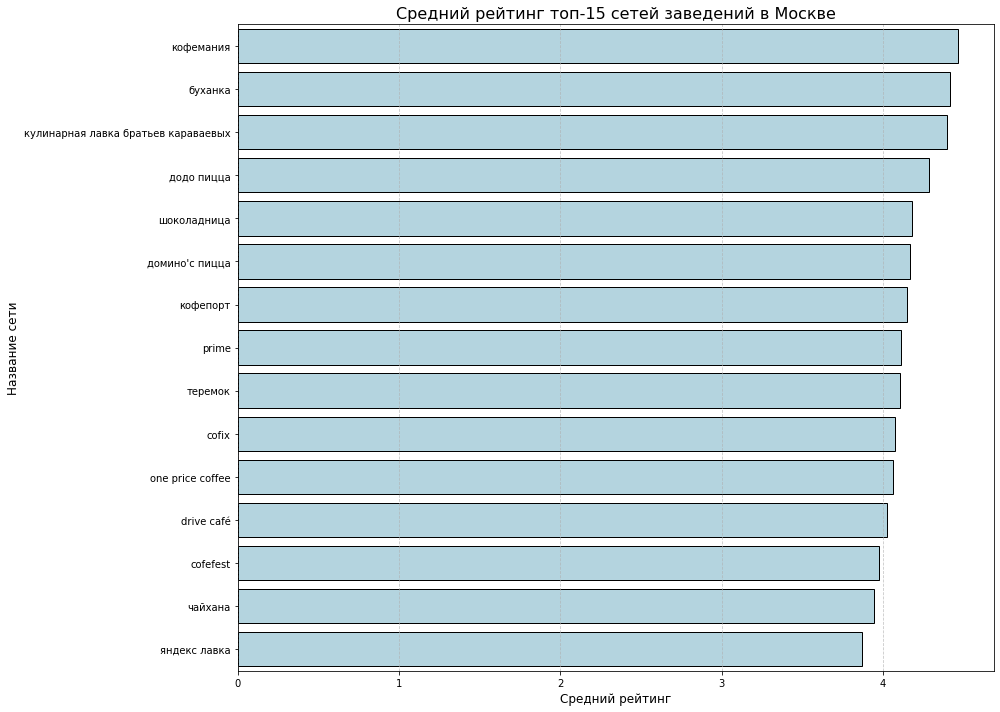

In [45]:
# строим столбчатую диаграмму
plt.figure(figsize=(14, 10))
sns.barplot(
    x='avg_rating', 
    y='name', 
    data=top_chains2,
    color='lightblue',  # Цветовая гамма
    edgecolor='black' # Границы столбцов
)

# Настройка оформления
plt.title('Средний рейтинг топ-15 сетей заведений в Москве', fontsize=16)
plt.xlabel('Средний рейтинг', fontsize=12)
plt.ylabel('Название сети', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Сетка только по X

# Отображаем график
plt.tight_layout()
plt.show()

Самые популярные заведения это кофейня Шоколадница(120 заведений) и пиццерия Домино'с Пицца(76 заведений), а самые не популярные это Drive-cafe(24 заведений) и Кофемания(22 заведений). А самая низкая оценка у яндекс лавки.

In [ ]:
district_bill = df.groupby('district').agg(
    avg=('middle_avg_bill', 'mean'))
district_bill = district_bill.sort_values('avg', ascending=False)
print(district_bill)

In [ ]:
# Строим столбчатую диаграмму
district_bill.plot(kind='barh', color='skyblue', grid=True, figsize=(12, 8))  # Тип диаграммы и цвет

# Добавляем подписи
plt.title('Распределение админестративных районов', fontsize=16)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Район', fontsize=14)
plt.xticks(rotation=0)  # Наклон подписей по оси X для удобства

# Отображаем график
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Чем дальше от центра города тем меньше цены. В центральном районе самые высокие цены в городе(средний чек 1191), западная часть города на втором месте(средний чек 1053), самые дешевые округа это Юго-восточный(средний чек 654) и Северо-восточный(средний чек 716).

---


---

### Промежуточный вывод



- средний чек самый высокий в центре города.
- самая популярная категория сетевых заведений кофейня.
- самый высокий средний рейтинг у пабов или баров.
- самый высокий показатель среднего числа посадочных мест у ресторанов.
- сетевых заведений меньше чем не сетевых.
- самая популярная категория всех заведений кафе.
- самое большое количество заведений в центральном районе.
- в центральном районе больше всего заведений типа ресторан.

## 4. Итоговый вывод и рекомендации



 **1. Общий обзор проделанной работы:**
- Исследовали количество объектов общественного питания по каждой категории.
- Исследовали распределение количества заведений по административным районам Москвы.
- Исследовали: Каких заведений больше — сетевых или несетевых.
- Исследовали количество посадочных мест в заведениях.
- Исследовали рейтинг заведений.
- Изучили, с какими данными показывают самую сильную корреляцию рейтинги заведений.
- Нашли топ-15 популярных сетей в Москве.
- Изучили вариацию среднего чека заведения в зависимости от района Москвы

 **2. Ответы на исследовательские вопросы, или главные выводы:**
- средний чек самый высокий в центре города.
- самая популярная категория сетевых заведений кофейня.
- самый высокий средний рейтинг у пабов или баров.
- самый высокий показатель среднего числа посадочных мест у ресторанов.
- сетевых заведений меньше чем не сетевых.
- самая популярная категория всех заведений кафе.
- самое большое количество заведений в центральном районе.
- в центральном районе больше всего заведений типа ресторан.

 **3. Рекомендации на основе анализа данных:**
Открыть в центре города сетевую кофейню совмещенную с рестораном и баром работающим круглосуточно.